## Ejercicios de pair programming 18 enero: Intro a Machine Learning

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("../datos/world_risk_index.csv")

In [27]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


- Region	String	Name of the region.
- WRI	Decimal	World Risk Score of the region.
- Exposure	Decimal	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
- Vulnerability	Decimal	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
- Susceptibility	Decimal	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
- Lack of Coping Capabilities	Decimal	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
- Lack of Adaptive Capacities	Decimal	Adaptive capacities related to coming natural events, climate change, and other challenges.
- Year	Decimal	Year data is being described.
- WRI Category	String	WRI Category for the given WRI Score.
- Exposure Category	String	Exposure Category for the given Exposure Score.
- Vulnerability Categoy	String	Vulnerability Category for the given Vulnerability Score.
- Susceptibility Category	String	Susceptibility Category for the given Susceptibility Score.

Nuestra variable respuesta será Exposure para poder predecir cual el riesgo de un desastre natural en una región determinada

In [28]:
df.Year.unique() #Tenemos datos desde 2011 hasta 2021

array([2011, 2013, 2015, 2014, 2021, 2017, 2019, 2020, 2012, 2018, 2016])

In [29]:
df.Year.value_counts()

2021    181
2020    181
2019    180
2011    173
2013    173
2012    173
2018    172
2015    171
2014    171
2017    171
2016    171
Name: Year, dtype: int64

In [30]:
df.Region.value_counts()

Vanuatu                          11
Lesotho                          11
Turkmenistan                     11
Eritrea                          11
Peru                             11
                                 ..
Zentralafrik. Republik            1
Ver. Arabische Emirate            1
Eswatini                          1
T. f. Yugo. Rep. of Macedonia     1
Korea Republic of 4.59            1
Name: Region, Length: 306, dtype: int64

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [32]:
df.shape

(1917, 12)

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WRI,1917.0,7.551763,5.553257,0.02,3.7400,6.52,9.400,56.71
Exposure,1917.0,15.388336,10.240135,0.05,10.1600,12.76,16.450,99.88
Vulnerability,1917.0,48.075759,13.835666,14.31,37.0400,47.10,60.060,76.47
Susceptibility,1917.0,30.739431,15.667030,8.26,17.7900,25.40,42.640,70.83
Lack of Coping Capabilities,1917.0,70.438289,15.038854,31.59,59.3300,74.23,83.000,94.36
Lack of Adaptive Capacities,1916.0,43.090511,13.551156,11.16,33.1925,43.08,53.065,76.11
Year,1917.0,2016.049557,3.182045,2011.00,2013.0000,2016.00,2019.000,2021.00


In [34]:
df.describe(include = 'O').T

,count,unique,top,freq
Region,1917,306,Vanuatu,11
Exposure Category,1917,5,Very Low,393
WRI Category,1916,5,Very Low,393
Vulnerability Category,1913,5,Very Low,386
Susceptibility Category,1917,5,Very Low,390


In [35]:
df['Region'].unique()

array(['Vanuatu', 'Tonga', 'Philippinen', 'Salomonen', 'Guatemala',
       'Bangladesch', 'Timor-Leste', 'Costa Rica', 'Kambodscha',
       'El Salvador', 'Nicaragua', 'Papua-Neuguinea', 'Madagaskar',
       'Brunei Darussalam', 'Afghanistan', 'Niger', 'Gambia', 'Bhutan',
       'Fidschi', 'Guinea-Bissau', 'Jamaika', 'Tschad', 'Honduras',
       'Dominikanische Republik', 'Chile', 'Mauritius', 'Senegal',
       'Indonesien', 'Burkina Faso', 'Burundi', 'Mali', 'Haiti',
       'Sierra Leone', 'Vietnam', 'Japan', 'Benin', 'Togo', 'Kamerun',
       'Albanien', 'Mosambik', 'Mauretanien', 'Simbabwe', 'Guinea',
       'Kap Verde', 'Usbekistan', 'Ghana', 'Suriname', 'Sudan', 'Liberia',
       'Nigeria', 'Elfenbeinküste', 'Guyana', 'Malawi', 'Ecuador',
       'Ruanda', 'Tansania', 'Myanmar', 'Kirgisistan', 'Sambia',
       'Äthiopien', 'Algerien', 'Angola', 'Samoa', 'Lesotho', 'Sri Lanka',
       'Pakistan', 'Kenia', 'Kongo', 'Niederlande', 'Panama', 'Indien',
       'Uganda', 'Tadschikistan', 

In [36]:
df.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
columnas_nuevas = {col :  col.strip().lower().replace(' ', '_') for col in df.columns}

In [39]:
df.rename(columns = columnas_nuevas, inplace = True)

In [40]:
df.columns

Index(['region', 'wri', 'exposure', 'vulnerability', 'susceptibility',
       'lack_of_coping_capabilities', 'lack_of_adaptive_capacities', 'year',
       'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category'],
      dtype='object')

In [41]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,32.00,56.33,56.81,37.14,79.34,53.96,2011
1,29.08,56.04,51.90,28.94,81.80,44.97,2011


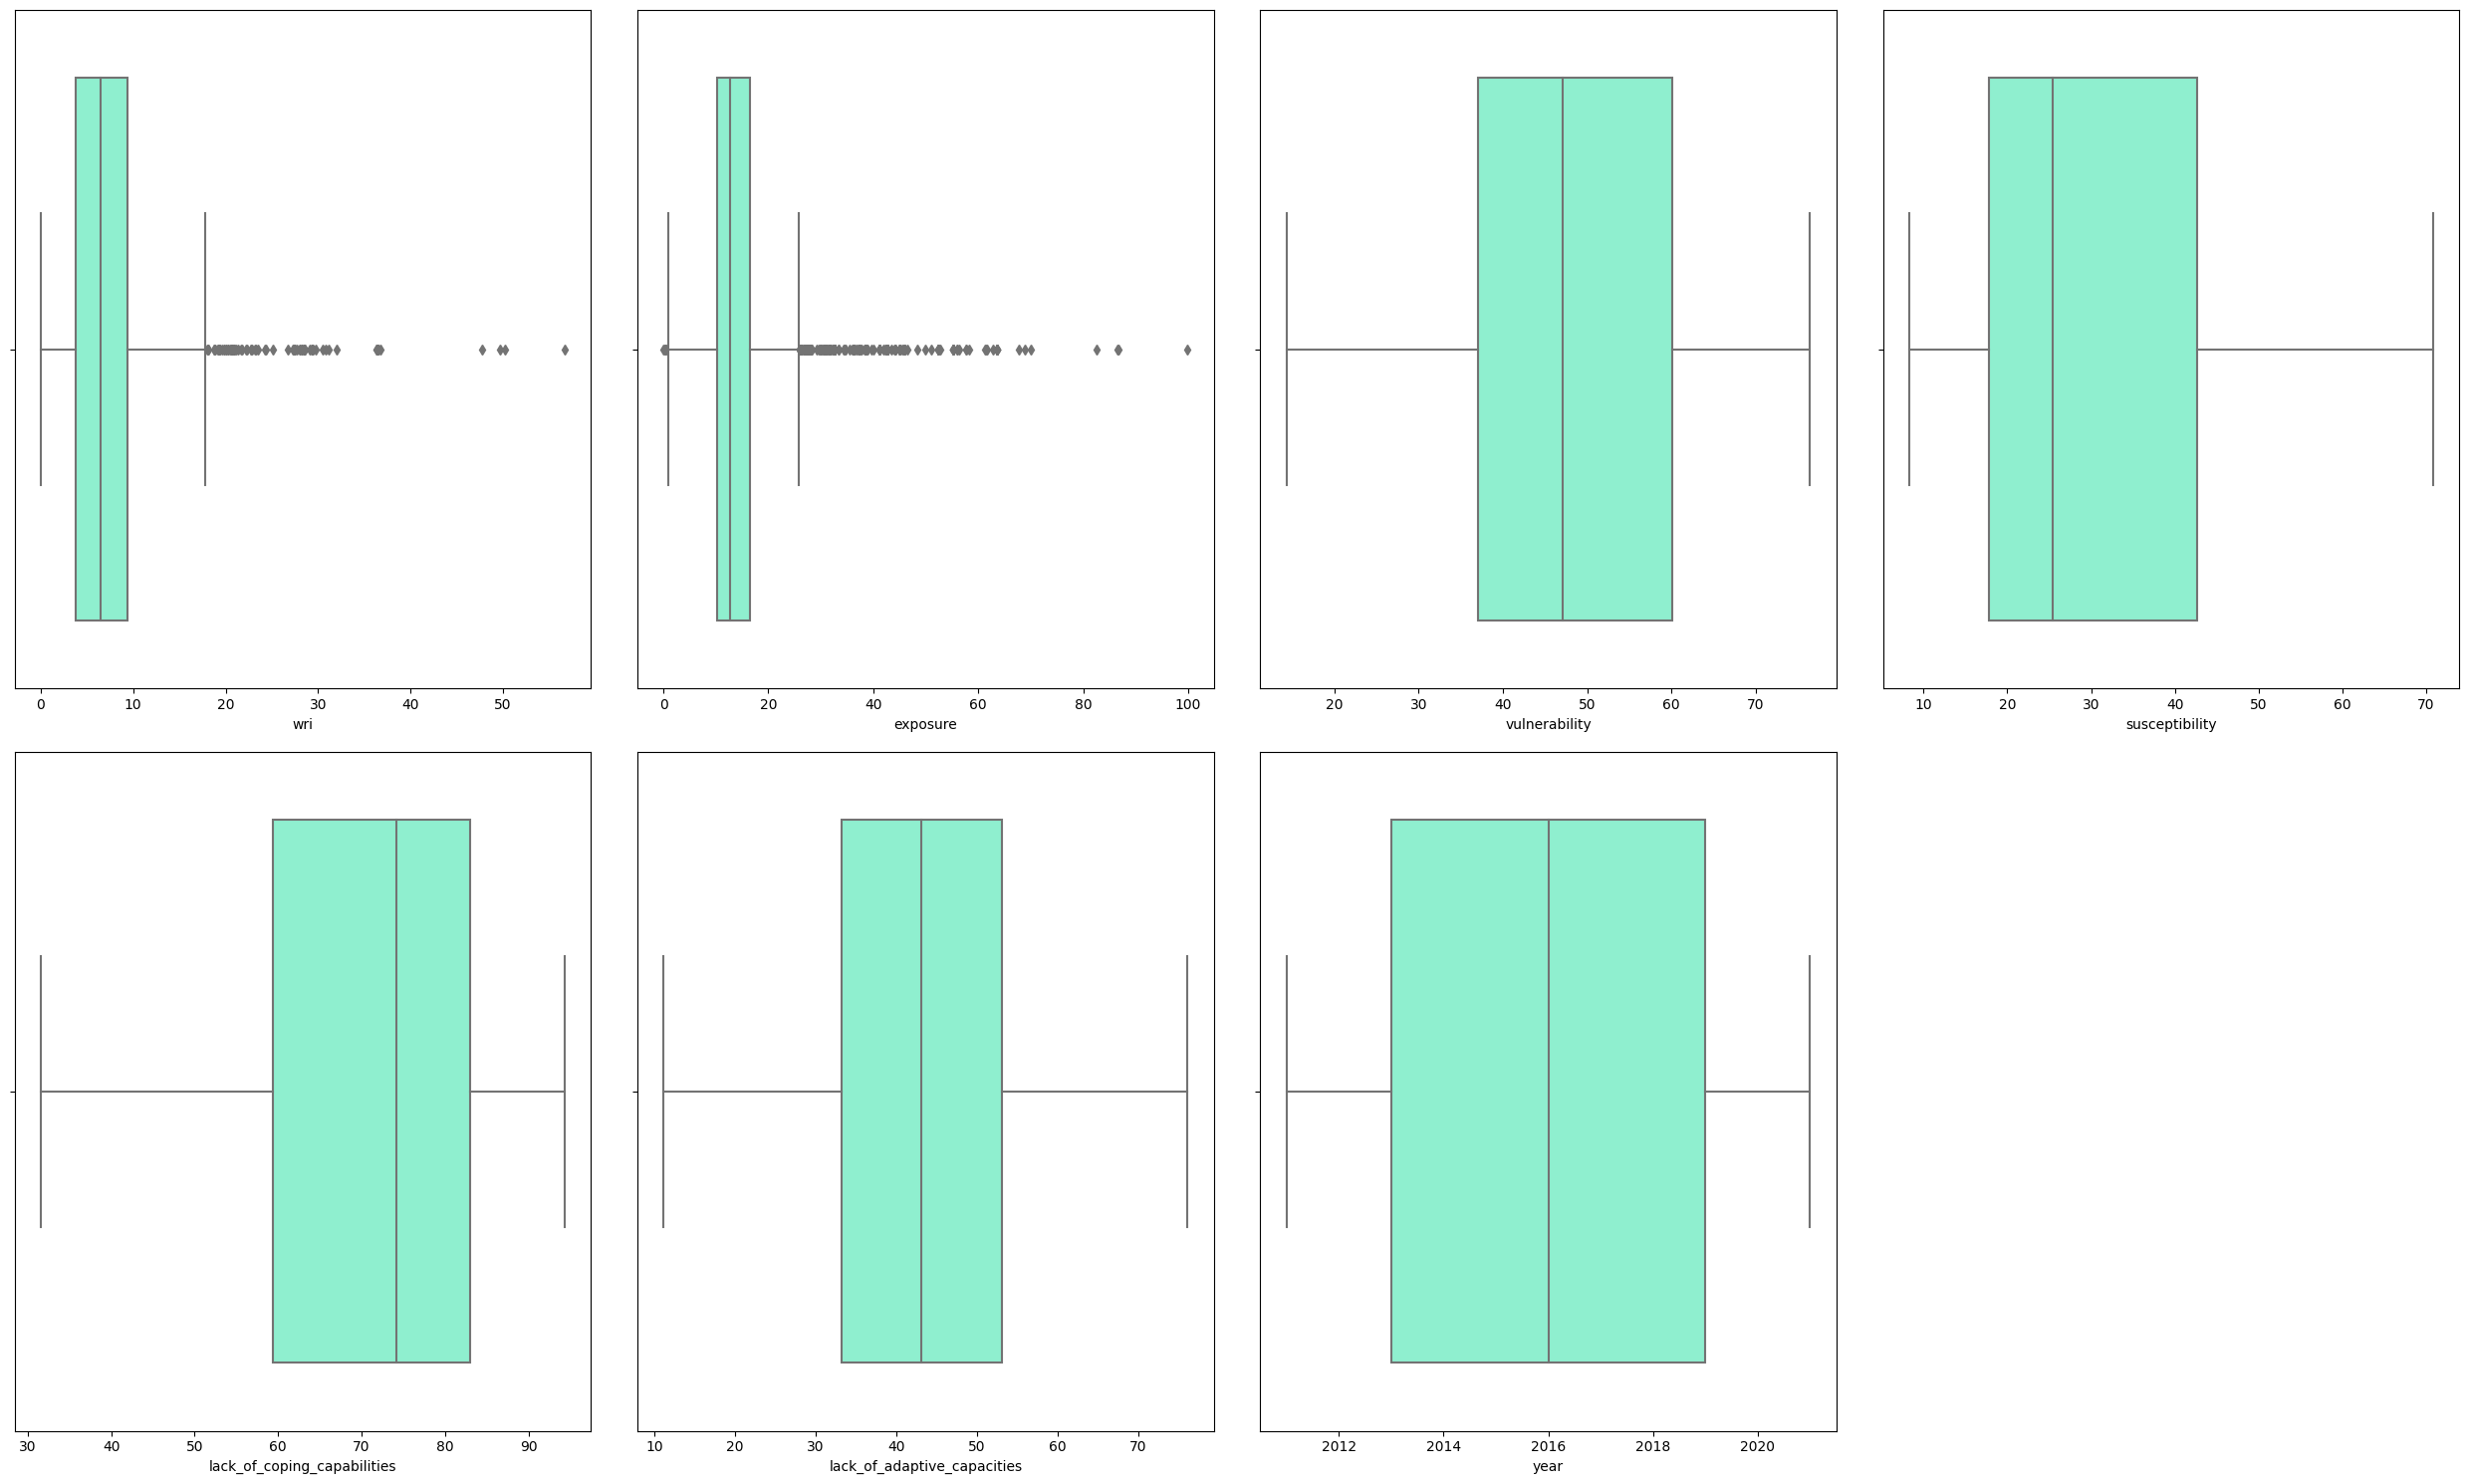

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [43]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [45]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(['exposure'], df)

In [48]:
ind.values()

dict_values([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 20, 24, 25, 34, 68, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 184, 185, 186, 187, 188, 191, 218, 345, 346, 347, 348, 349, 350, 351, 352, 353, 355, 357, 358, 359, 361, 362, 371, 395, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 528, 529, 530, 532, 533, 542, 567, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 705, 706, 709, 714, 716, 720, 733, 753, 869, 870, 871, 872, 873, 874, 875, 876, 877, 880, 881, 882, 883, 885, 890, 918, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1056, 1057, 1060, 1065, 1066, 1069, 1093, 1116, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1246, 1248, 1249, 1265, 1284, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1410, 1411, 1413, 1414, 1415, 1416, 1419, 1451, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 

In [47]:
df[df.iloc[:,ind.values()]]


KeyboardInterrupt



In [ ]:

for k, v in ind.items():
    median = df[k].median()
    for i in v:
        df.loc[i,k] = median 

In [ ]:
df.to_csv('../datos/world_risk_index2.csv')